In [1]:
%load_ext watermark

## Data dependencies

In [2]:
mfcc_df_path = "../data/CXH2_GY.mfcc.parquet"
w2v_df_path = "../data/CXH2_GY.w2v.parquet"

!sha1sum $mfcc_df_path $w2v_df_path

c5bb2c914f84415e2afbe8c510e08247f9c95974  ../data/CXH2_GY.mfcc.parquet
53afcbbae6cbf63b8b2d4c81fecd44e8dda1f9d6  ../data/CXH2_GY.w2v.parquet


## Load data

In [3]:
import pandas as pd
df_mfcc = pd.read_parquet(mfcc_df_path)
df_w2v = pd.read_parquet(w2v_df_path)

In [4]:
df_mfcc.head(2)

,filename,idx,start_t,end_t,pinyin,char,phone,type,mfcc_first,mfcc_mean
0,CXH2_GY,2,10.666971,10.873312,zi4,自,z,nasp,"[0.0, 0.0, 0.0, 0.0, 0.0, -123.12713, -118.162...","[-51.56747, -52.02446, -52.62525, -53.201782, ..."
1,CXH2_GY,5,11.472899,11.660520,gang1,剛,g,nasp,"[0.0, 0.0, 0.0, 0.0, 0.0, -57.57262, -29.81437...","[-16.012426, -18.668547, -21.123747, -24.16140..."


In [5]:
import numpy as np
from sklearn.manifold import TSNE
import plotly_express as px

assert (df_w2v.phone == df_mfcc.phone).all()
phone_labels = df_w2v.phone
w2v_mean = np.vstack(df_w2v.w2v_mean.to_numpy())
mfcc_mean = np.vstack(df_mfcc.mfcc_mean.to_numpy())
SEED = 122

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## MFCC phone LDA

In [7]:
trainX, testX, trainY, testY = train_test_split(
                                mfcc_mean, phone_labels, test_size=.2,
                                stratify=phone_labels, 
                                random_state=SEED,
                                )

lda_mfcc = LinearDiscriminantAnalysis()
lda_mfcc.fit(trainX, trainY)

print(classification_report(testY, lda_mfcc.predict(testX)))

              precision    recall  f1-score   support

           b       0.47      0.38      0.42        53
           c       0.40      0.36      0.38        11
          ch       0.57      0.63      0.60        19
           d       0.67      0.73      0.70       155
           g       0.35      0.31      0.33        54
           k       0.67      0.53      0.59        45
           p       0.56      0.45      0.50        11
           t       0.59      0.73      0.65        64
           z       0.23      0.24      0.23        29
          zh       0.65      0.58      0.62        62

    accuracy                           0.57       503
   macro avg       0.51      0.50      0.50       503
weighted avg       0.56      0.57      0.56       503



## W2V phone LDA

In [8]:
trainX, testX, trainY, testY2 = train_test_split(
                                w2v_mean, phone_labels, test_size=.2,
                                stratify=phone_labels, 
                                random_state=SEED,
                                )

lda_w2v = LinearDiscriminantAnalysis()
lda_w2v.fit(trainX, trainY)

print(classification_report(testY, lda_w2v.predict(testX)))

              precision    recall  f1-score   support

           b       0.77      0.70      0.73        53
           c       0.43      0.27      0.33        11
          ch       0.54      0.74      0.62        19
           d       0.71      0.73      0.72       155
           g       0.56      0.57      0.57        54
           k       0.83      0.78      0.80        45
           p       0.38      0.27      0.32        11
           t       0.69      0.72      0.70        64
           z       0.32      0.31      0.32        29
          zh       0.71      0.71      0.71        62

    accuracy                           0.67       503
   macro avg       0.59      0.58      0.58       503
weighted avg       0.67      0.67      0.66       503



## Visualize

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Wav2Vec - tSNE on 9 LDA axes')

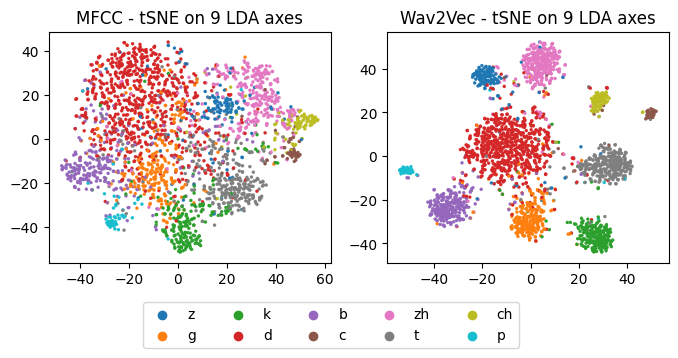

In [12]:
import seaborn as sns
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)

# mfcc
lda_proj = lda_mfcc.transform(mfcc_mean)
tsne_proj = TSNE().fit_transform(lda_proj)
sns.scatterplot(x=tsne_proj[:,0], y=tsne_proj[:,1], 
                hue=phone_labels, 
                s=5,
                edgecolor=None)
plt.title("MFCC - tSNE on 9 LDA axes")
plt.legend(ncols=5, loc="lower center", bbox_to_anchor=(1,-0.4))
# w2v
plt.subplot(1, 2, 2)
lda_proj = lda_w2v.transform(w2v_mean)
tsne_proj = TSNE().fit_transform(lda_proj)
sns.scatterplot(x=tsne_proj[:,0], y=tsne_proj[:,1], 
                hue=phone_labels, 
                s=5,
                edgecolor=None,
                legend=False)
plt.title("Wav2Vec - tSNE on 9 LDA axes")